In [64]:
import numpy as np
import matplotlib.pyplot as plt
from helper import *
from scipy import fftpack as fp
from skimage import io, color, util

## **1. [45] Terapkan minimal 2 Low Pass dan 2 High Pass Filter terhadap citra building.jpg, gunakan dua nilai D0 yang berbeda pada masing-masing filter!**
<img src="Citra Tugas Lab 3\bulding.jpg">

## a. [5] Tampilkan citra tersebut pada domain frekuensi!

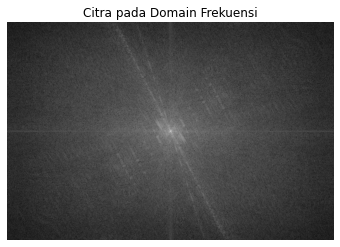

In [65]:
# Load image
image = color.rgb2gray(color.rgba2rgb(io.imread("Citra Tugas Lab 3/bulding.jpg")))

# Calculate DFT
ft = fp.fft2(image)

# Calculate magnitude of imaginary and real numbers
ft_norm = abs(ft)

# Scale image
ft_scale = np.log(1 + ft_norm)

# Shift low frequency to the center of image
ft_shift = fp.fftshift(ft_scale)

plt.imshow(ft_shift, cmap="gray"); plt.title('Citra pada Domain Frekuensi'); plt.axis('off')
plt.show()

## b. [17] Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan Low Pass Filter dan jelaskan perbedaannya!

In [66]:
def spatial(fourier_img, shape):
    # Calculate IDFT for spatial domain transformation
    spatial_img = fp.ifft2(fourier_img).real
    spatial_img = spatial_img[:shape[0],:shape[1]]
    return spatial_img

def spectrum(fourier_img):
    # Shift and scale for fourier spectrum display
    shift = fp.fftshift(fourier_img)
    scale = np.log(1+abs(shift))
    return scale

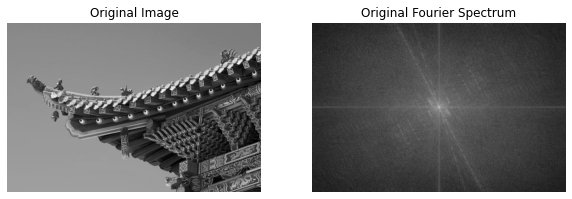

In [67]:
"""Original Image"""
w, l = paddedsize(*image.shape)

# Calculate DFT
f = fp.fft2(image,(w,l))
fourier = spectrum(f)

# Show Original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(image, cmap='gray'); plt.title("Original Image"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fourier, cmap='gray'); plt.title("Original Fourier Spectrum"); plt.axis("off")
plt.show()

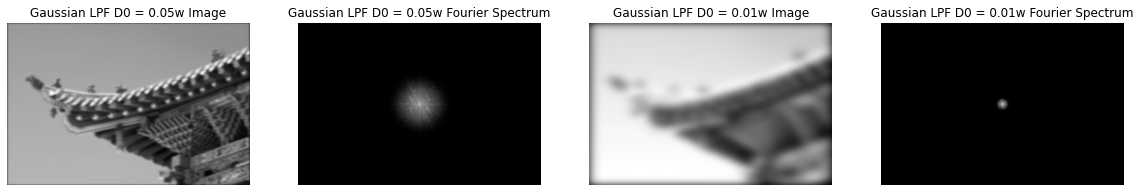

In [68]:
"""Gaussian Low Pass Filter"""
plt.figure(figsize=(20, 5))

# Create gaussian lowpass filter with D0 = 0.05w
h = lpfilter('gaussian', w, l, 0.05 * w)

# Apply lowpass filter
LPFSg_image = h * f
LPFSg_image_spectrum = spectrum(LPFSg_image)
LPFSg_image_spatial = spatial(LPFSg_image, image.shape)

# Show Gaussian LPF image
plt.subplot(1, 4, 1); plt.imshow(LPFSg_image_spatial, cmap='gray'); plt.title("Gaussian LPF D0 = 0.05w Image"); plt.axis("off")
plt.subplot(1, 4, 2); plt.imshow(LPFSg_image_spectrum, cmap='gray'); plt.title("Gaussian LPF D0 = 0.05w Fourier Spectrum"); plt.axis("off")

# Create gaussian lowpass filter with D0 = 0.01w
h = lpfilter('gaussian', w, l, 0.01 * w)

# Apply lowpass filter
LPFSg_image = h * f
LPFSg_image_spectrum = spectrum(LPFSg_image)
LPFSg_image_spatial = spatial(LPFSg_image, image.shape)

# Show Gaussian LPF image
plt.subplot(1, 4, 3); plt.imshow(LPFSg_image_spatial, cmap='gray'); plt.title("Gaussian LPF D0 = 0.01w Image"); plt.axis("off")
plt.subplot(1, 4, 4); plt.imshow(LPFSg_image_spectrum, cmap='gray'); plt.title("Gaussian LPF D0 = 0.01w Fourier Spectrum"); plt.axis("off")
plt.show()

> Jika dilihat pada gambar di atas, pemberian Gaussian Lowpass Filter sama seperti melakukan smoothing pada citra. Smoothing dilakukan dengan membatasi frekuensi tinggi dan membiarkan frekuensi rendah. Hal ini dilakukan karena detail suatu citra berada pada frekuensi tinggi.
Dapat dilihat bahwa dengan memberikan nilai D0 lebih kecil, maka citra akan menjadi lebih blurry.

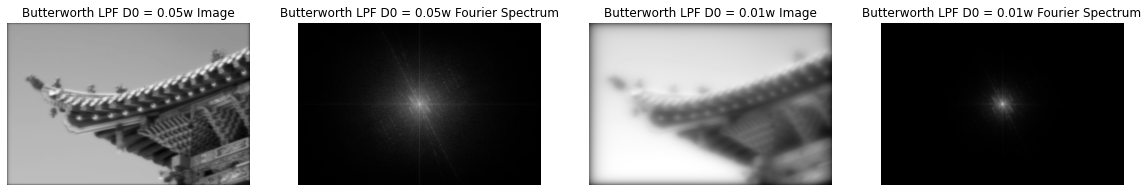

In [69]:
"""Butterworth Low Pass Filter"""
plt.figure(figsize=(20, 5))

# Create butterworth lowpass filter with D0 = 0.05w
h = lpfilter('btw', w, l, 0.05 * w)

# Apply lowpass filter
LPFSb_image = h * f
LPFSb_image_spectrum = spectrum(LPFSb_image)
LPFSb_image_spatial = spatial(LPFSb_image, image.shape)

# Show Butterworth LPF image
plt.subplot(1, 4, 1); plt.imshow(LPFSb_image_spatial, cmap='gray'); plt.title("Butterworth LPF D0 = 0.05w Image"); plt.axis("off")
plt.subplot(1, 4, 2); plt.imshow(LPFSb_image_spectrum, cmap='gray'); plt.title("Butterworth LPF D0 = 0.05w Fourier Spectrum"); plt.axis("off")

# Create butterworth lowpass filter with D0 = 0.01w
h = lpfilter('btw', w, l, 0.01 * w)

# Apply lowpass filter
LPFSb_image = h * f
LPFSb_image_spectrum = spectrum(LPFSb_image)
LPFSb_image_spatial = spatial(LPFSb_image, image.shape)

# Show Butterworth LPF image
plt.subplot(1, 4, 3); plt.imshow(LPFSb_image_spatial, cmap='gray'); plt.title("Butterworth LPF D0 = 0.01w Image"); plt.axis("off")
plt.subplot(1, 4, 4); plt.imshow(LPFSb_image_spectrum, cmap='gray'); plt.title("Butterworth LPF D0 = 0.01w Fourier Spectrum"); plt.axis("off")
plt.show()

> Jika dilihat pada gambar di atas, pemberian Butterworth Lowpass Filter sama seperti melakukan Gaussian Lowpass Filter. Sama seperti Gaussian Lowpass Filter juga, dengan memberikan nilai D0 lebih kecil, maka citra akan menjadi lebih blurry.

## c. [17] Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan High Pass Filter dan jelaskan perbedaannya!


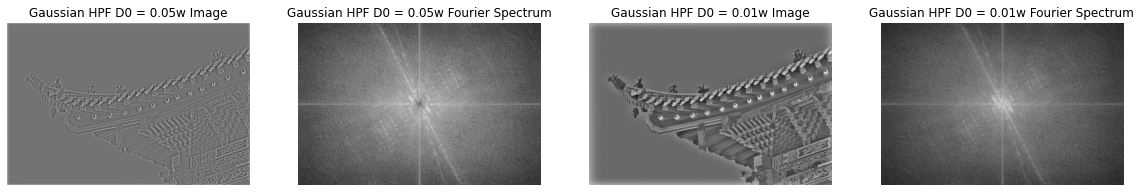

In [70]:
"""Gaussian High Pass Filter"""
plt.figure(figsize=(20, 5))

# Create gaussian highpass filter with D0 = 0.05w
h = hpfilter('gaussian', w, l, 0.05 * w)

# Apply highpass filter
HPFSg_image = h * f
HPFSg_image_spectrum = spectrum(HPFSg_image)
HPFSg_image_spatial = spatial(HPFSg_image, image.shape)

# Show Gaussian HPF image
plt.subplot(1, 4, 1); plt.imshow(HPFSg_image_spatial, cmap='gray'); plt.title("Gaussian HPF D0 = 0.05w Image"); plt.axis("off")
plt.subplot(1, 4, 2); plt.imshow(HPFSg_image_spectrum, cmap='gray'); plt.title("Gaussian HPF D0 = 0.05w Fourier Spectrum"); plt.axis("off")

# Create gaussian highpass filter with D0 = 0.01w
h = hpfilter('gaussian', w, l, 0.01 * w)

# Apply highpass filter
HPFSg_image = h * f
HPFSg_image_spectrum = spectrum(HPFSg_image)
HPFSg_image_spatial = spatial(HPFSg_image, image.shape)

# Show Gaussian HPF image
plt.subplot(1, 4, 3); plt.imshow(HPFSg_image_spatial, cmap='gray'); plt.title("Gaussian HPF D0 = 0.01w Image"); plt.axis("off")
plt.subplot(1, 4, 4); plt.imshow(HPFSg_image_spectrum, cmap='gray'); plt.title("Gaussian HPF D0 = 0.01w Fourier Spectrum"); plt.axis("off")
plt.show()

> Jika dilihat pada gambar di atas, pemberian Gaussian Highpass Filter sama seperti melakukan sharpening pada citra. Sharpening dilakukan dengan membatasi frekuensi rendah dan membiarkan frekuensi tinggi. Hal ini dilakukan karena detail suatu citra berada pada frekuensi tinggi.
Dapat dilihat bahwa dengan memberikan nilai D0 lebih kecil, maka citra akan menjadi lebih mirip dengan citra aslinya.

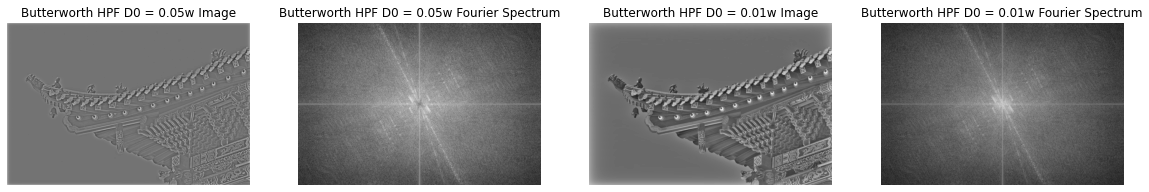

In [71]:
"""Butterworth High Pass Filter"""
plt.figure(figsize=(20, 5))

# Create butterworth highpass filter with D0 = 0.05w
h = hpfilter('btw', w, l, 0.05 * w)

# Apply highpass filter
HPFSb_image = h * f
HPFSb_image_spectrum = spectrum(HPFSb_image)
HPFSb_image_spatial = spatial(HPFSb_image, image.shape)

# Show Butterworth HPF image
plt.subplot(1, 4, 1); plt.imshow(HPFSb_image_spatial, cmap='gray'); plt.title("Butterworth HPF D0 = 0.05w Image"); plt.axis("off")
plt.subplot(1, 4, 2); plt.imshow(HPFSb_image_spectrum, cmap='gray'); plt.title("Butterworth HPF D0 = 0.05w Fourier Spectrum"); plt.axis("off")

# Create butterworth highpass filter with D0 = 0.01w
h = hpfilter('btw', w, l, 0.01 * w)

# Apply highpass filter
HPFSb_image = h * f
HPFSb_image_spectrum = spectrum(HPFSb_image)
HPFSb_image_spatial = spatial(HPFSb_image, image.shape)

# Show Butterworth HPF image
plt.subplot(1, 4, 3); plt.imshow(HPFSb_image_spatial, cmap='gray'); plt.title("Butterworth HPF D0 = 0.01w Image"); plt.axis("off")
plt.subplot(1, 4, 4); plt.imshow(HPFSb_image_spectrum, cmap='gray'); plt.title("Butterworth HPF D0 = 0.01w Fourier Spectrum"); plt.axis("off")
plt.show()

> Jika dilihat pada gambar di atas, pemberian Butterworth Highpass Filter sama seperti melakukan Gaussian Highpass Filter. Sama seperti Gaussian Highpass Filter juga, dengan memberikan nilai D0 lebih kecil, maka citra akan menjadi lebih mirip dengan citra aslinya.

## d. [6] Bagaimana pengaruh dari nilai D0 yang anda gunakan pada bagian (b) dan (c)?

> Pada Lowpass Filter, nilai D0 yang lebih kecil membuat citra semakin blurry. Sedangkan pada Highpass Filter, nilai D0 yang lebih besar membuat citra seperti dilakukan edge detection karena edge atau outline memiliki frekuensi tinggi sehingga pada Highpass Filter dibiarkan.

## **2. [55] Berikut adalah citra train.jpg yang corrupted sehingga menimbulkan pattern noise.!**
<img src="Citra Tugas Lab 3\train.jpg">

## a. [5] Tampilkan citra tersebut pada domain frekuensi!


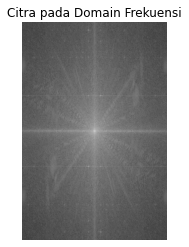

In [74]:
# Load image
image2 = io.imread("Citra Tugas Lab 3/train.jpg")

# Calculate DFT
ft2 = fp.fft2(image2)

# Calculate magnitude of imaginary and real numbers
ft_norm2 = abs(ft2)

# Scale image
ft_scale2 = np.log(1 + ft_norm2)

# Shift low frequency to the center of image
ft_shift2 = fp.fftshift(ft_scale2)

plt.imshow(ft_shift2, cmap="gray"); plt.title('Citra pada Domain Frekuensi'); plt.axis('off')
plt.show()

## b. [30] Lakukan filtering yang tepat untuk mereduksi noise yang ada dan jelaskan mengapa anda memilih melakukan filtering tersebut!


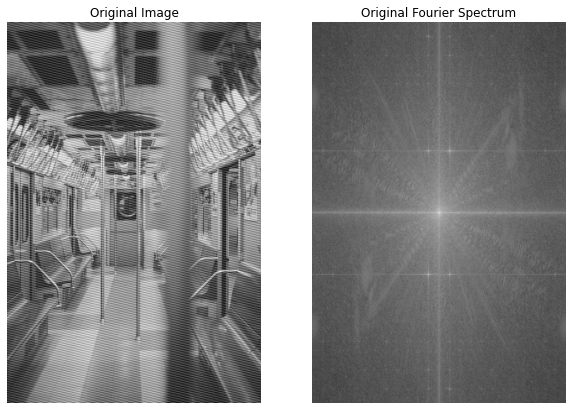

In [148]:
"""Original Image"""
w, l = paddedsize(*image2.shape)

# Calculate DFT
f2 = fp.fft2(image2,(w,l))
fourier2 = spectrum(f2)

# Show Original image
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1); plt.imshow(image2, cmap='gray'); plt.title("Original Image"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fourier2, cmap='gray'); plt.title("Original Fourier Spectrum"); plt.axis("off")
plt.show()

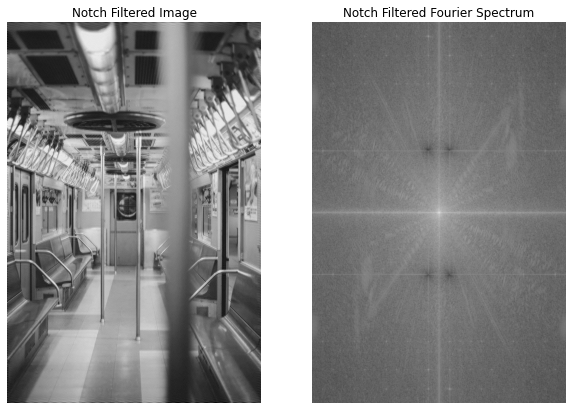

In [149]:
"""Notch Filter"""
plt.figure(figsize=(10, 10))

# Apply notch filter
H1 = notch('btw', w, l, 50, 53, 311)
H2 = notch('btw', w, l, 50, 53, -311)
H3 = notch('btw', w, l, 50, -53, 311)
H4 = notch('btw', w, l, 50, -53, -311)

# Apply notch filter
nf = f2*H1*H2*H3*H4
nf_image_spectrum = spectrum(nf)
nf_image_spatial = spatial(nf, image2.shape)

# Show Butterworth HPF image
plt.subplot(1, 2, 1); plt.imshow(nf_image_spatial, cmap='gray'); plt.title("Notch Filtered Image"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(nf_image_spectrum, cmap='gray'); plt.title("Notch Filtered Fourier Spectrum"); plt.axis("off")
plt.show()

> Notch filter dapat digunakan untuk membatasi atau membiarkan frekuensi tertentu. Dengan ini, notch filter dapat digunakan untuk menghilangkan noise pada suatu citra, yaitu dengan melakukan filter terhadap frekuensi noise pada citra tersebut, menghasilkan citra yang noise-free.

## c. [20] Tampilkan perbandingan citra sebelum dan sesudah filtering pada domain spasial dan frekuensi serta ceritakan hasilnya!

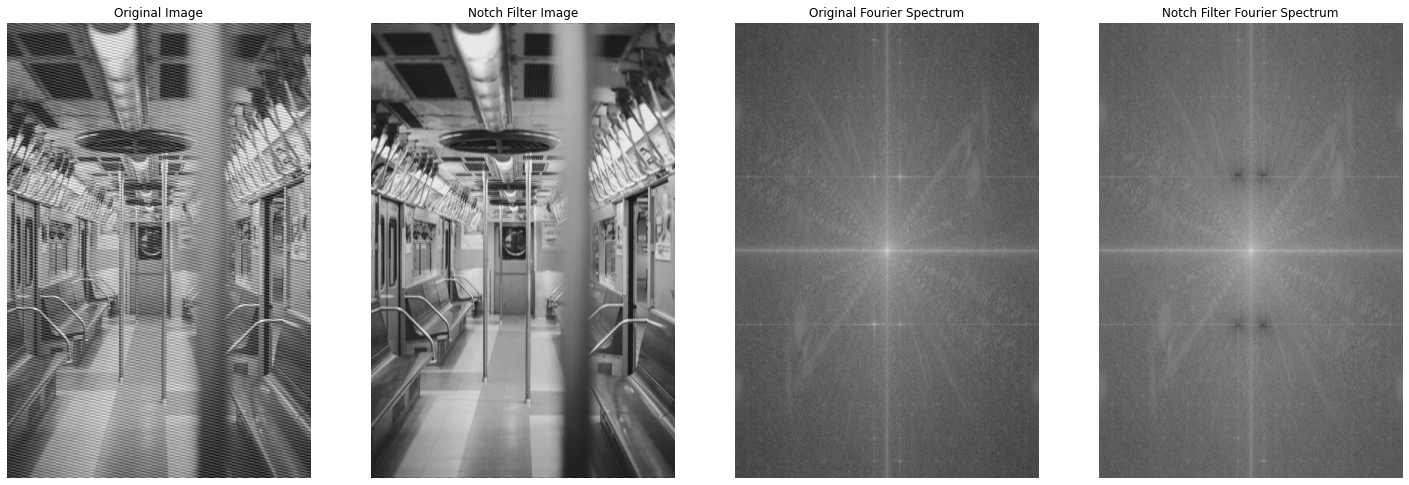

In [147]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 4, 1); plt.imshow(image2, cmap='gray'); plt.title("Original Image"); plt.axis("off")
plt.subplot(1, 4, 2); plt.imshow(nf_image_spatial, cmap='gray'); plt.title("Notch Filtered Image"); plt.axis("off")
plt.subplot(1, 4, 3); plt.imshow(fourier2, cmap='gray'); plt.title("Original Fourier Spectrum"); plt.axis("off")
plt.subplot(1, 4, 4); plt.imshow(nf_image_spectrum, cmap='gray'); plt.title("Notch Filtered Fourier Spectrum"); plt.axis("off")
plt.show()

> Jika dilihat, citra hasil notch filtering menghilangkan noise yang ada pada citra awal. Jika dilihat dari Fourier spectrumnya, notch filtering menutupi titik-titik tertentu pada spectrum yang memiliki frekuensi tinggi (dalam kasus ini merupakan noise padad citra awal).